# install requirements

In [1]:
%pip install --upgrade pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --upgrade git+https://github.com/ParkhomenkoDV/foil.git

  Cloning https://github.com/ParkhomenkoDV/foil.git to /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-req-build-1dv7e4sb
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/foil.git /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-req-build-1dv7e4sb
  Resolved https://github.com/ParkhomenkoDV/foil.git to commit bdc4f258287f1469a4df57e1d9ec80297a0a9a31
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/ParkhomenkoDV/decorators.git (to revision master) to /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-install-hjc7e32u/decorators_b3ce55142e974539b6ba7188149cd049
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/decorators.git /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-install-hjc7e32u/decorators_b3ce55142e974539b6ba7188149cd049
  Resolved https://g

**Restart kernel!**

# import requirements

Стандартные библиотеки

In [1]:
import pandas as pd
import numpy as np
from numpy import array, linspace, radians, degrees
import matplotlib.pyplot as plt

Частные библиотеки

In [2]:
from foil import METHODS, Foil

In [3]:
help(Foil)

Help on class Foil in module foil.foil:

class Foil(builtins.object)
 |  Foil(method: str, discreteness: int = 30, chord: float | int | numpy.number = 1, installation_angle: float | int | numpy.number = 0.0, step: float | int | numpy.number = 1.0, start_point: tuple | list | numpy.ndarray = (0, 0), name: str = '2025-05-20-01-01-12', **parameters) -> None
 |
 |  Относительный профиль
 |
 |  Methods defined here:
 |
 |  __init__(self, method: str, discreteness: int = 30, chord: float | int | numpy.number = 1, installation_angle: float | int | numpy.number = 0.0, step: float | int | numpy.number = 1.0, start_point: tuple | list | numpy.ndarray = (0, 0), name: str = '2025-05-20-01-01-12', **parameters) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __setattr__(self, key, value) -> None
 |      При установке новых атрибутов расчет обнуляется
 |
 |  __str__(self) -> str
 |      Return str(self).
 |
 |  center_pressure(self, x: float, relative: bool = Fa

# Моделирование профиля 

In [4]:
for method, value in METHODS.items():
    print(method)
    for k, v in value.items():
        print(f'{k}: {v}')
    print()

NACA
description: Четырёхзначные профиль крыла NACA определяется следующим образом:
Первая цифра обозначает максимальный прогиб в процентах от хорды.
Вторая цифра, описывающая расстояние максимального изгиба от передней кромки аэродинамического профиля в десятых долях хорды.
Последние две цифры обозначают максимальную толщину аэродинамического профиля в процентах от хорды.
attributes: {'relative_camber': {'description': 'относительная максимальная выпуклость', 'unit': '[]', 'type': (<class 'int'>, <class 'float'>, <class 'numpy.number'>), 'assert': (<function <lambda> at 0x139768cc0>,)}, 'x_relative_camber': {'description': 'относительна координата х максимальной выпуклости', 'unit': '[]', 'type': (<class 'float'>, <class 'numpy.floating'>), 'assert': (<function <lambda> at 0x139768c20>,)}, 'relative_thickness': {'description': 'максимальная относительная толщина', 'unit': '[]', 'type': (<class 'int'>, <class 'float'>, <class 'numpy.number'>), 'assert': (<function <lambda> at 0x139768b

## BMSTU

In [5]:
foil_bmstu = Foil('BMSTU', 30, 
                  chord=0.05, installation_angle=radians(30), step=0.03, name='BMSTU',
                  rotation_angle=radians(70),
                  relative_inlet_radius=0.06, relative_outlet_radius=0.03,
                  inlet_angle=radians(20), outlet_angle=radians(10),
                  x_ray_cross=0.4,
                  upper_proximity=0.5)

In [6]:
foil_bmstu.write('xlsx', relative=True)

Channel calculation: 100%|██████████| 32/32 [00:00<00:00, 1037.04it/s]


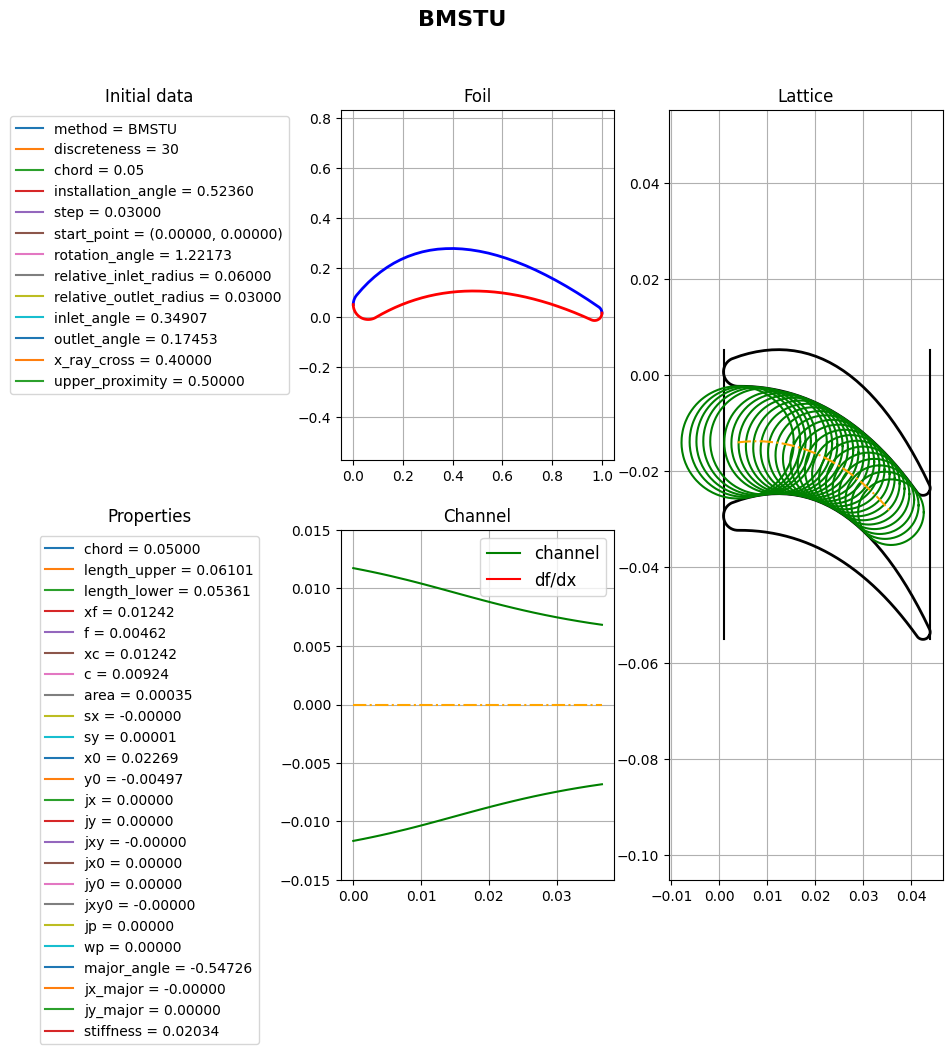

In [7]:
foil_bmstu.plot().show()

In [8]:
foil_bmstu.properties(relative=False)

{'chord': 0.05,
 'length_upper': 0.06101166277540305,
 'length_lower': 0.05360782737348219,
 'xf': 0.012415000000000002,
 'f': 0.004617917432868663,
 'xc': 0.012415000000000002,
 'c': 0.009235834865737326,
 'area': 0.0003506809620521813,
 'sx': -1.741334614626575e-06,
 'sy': 7.958549786435811e-06,
 'x0': 0.02269455900845732,
 'y0': -0.0049655806931642454,
 'jx': 2.7294927521251066e-08,
 'jy': 2.2460860225111346e-07,
 'jxy': -6.408296998760848e-08,
 'jx0': 1.8648189978522742e-08,
 'jy0': 4.399282450110052e-08,
 'jxy0': -2.456414882249639e-08,
 'jp': 6.264101447962326e-08,
 'wp': 2.2208620361605713e-06,
 'major_angle': -0.5472601481810417,
 'jx_major': -1.8150137810908545e-08,
 'jy_major': 8.079115229053182e-08,
 'stiffness': 0.02033722092513435}

CFD: 100%|██████████| 179/179 [00:00<00:00, 3871.86it/s]


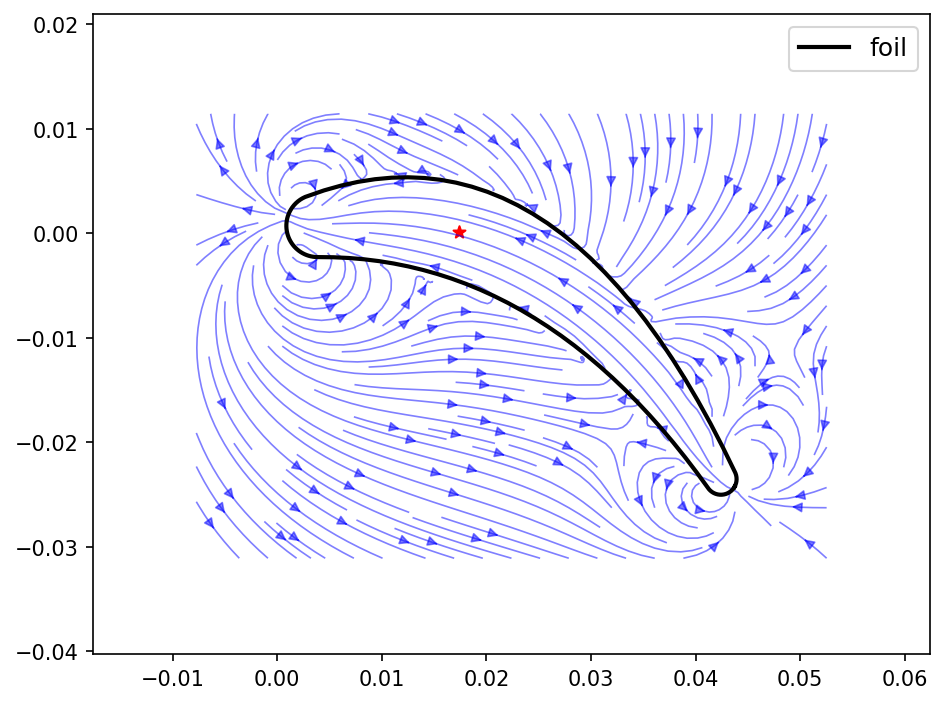

In [12]:
foil_bmstu.cfx(10, 5)

In [13]:
foil_bmstu.coordinates

((0.04372704814843359, -0.024262530941902432),
 (0.04375032056143741, -0.024220693982583703),
 (0.04377224601818661, -0.024178135661207068),
 (0.04379280218456927, -0.024134899329312395),
 (0.04381196812128521, -0.02409102902908709),
 (0.04382972430517556, -0.024046569448503034),
 (0.04384605264910979, -0.024001565875795713),
 (0.043860936520409954, -0.023956064153331857),
 (0.043874360757793406, -0.023910110630912668),
 (0.043886311686816615, -0.023863752118560136),
 (0.04389677713380451, -0.02381703583883453),
 (0.04390574643825105, -0.023770009378731697),
 (0.043913210463678416, -0.02372272064120914),
 (0.04391916160694377, -0.023675217796390192),
 (0.04392359380598415, -0.02362754923249611),
 (0.04392650254599147, -0.023579763506555954),
 (0.04392788486401148, -0.023531909294944545),
 (0.043927739351962, -0.02348403534379884),
 (0.043926066158067184, -0.023436190419363245),
 (0.043922866986706555, -0.02338842325831443),
 (0.043918145096678886, -0.023340782518116318),
 (0.0439119052

In [14]:
foil_bmstu.to_dataframe()

x         y
0    0.043727 -0.024263
1    0.043750 -0.024221
2    0.043772 -0.024178
3    0.043793 -0.024135
4    0.043812 -0.024091
..        ...       ...
174  0.043486 -0.024576
175  0.043554 -0.024503
176  0.043617 -0.024427
177  0.043675 -0.024347
178  0.043727 -0.024263

[179 rows x 2 columns]

In [15]:
foil_bmstu.write('txt')

## NACA

In [16]:
foil_naca = Foil('NACA', 40, 
                 chord=0.1, installation_angle=radians(30), step=0.06, name='NACA',
                 relative_thickness = 0.2,
                 x_relative_camber = 0.3,
                 relative_camber = 0.05,
                 closed = True)

Channel calculation: 100%|██████████| 42/42 [00:00<00:00, 1022.53it/s]


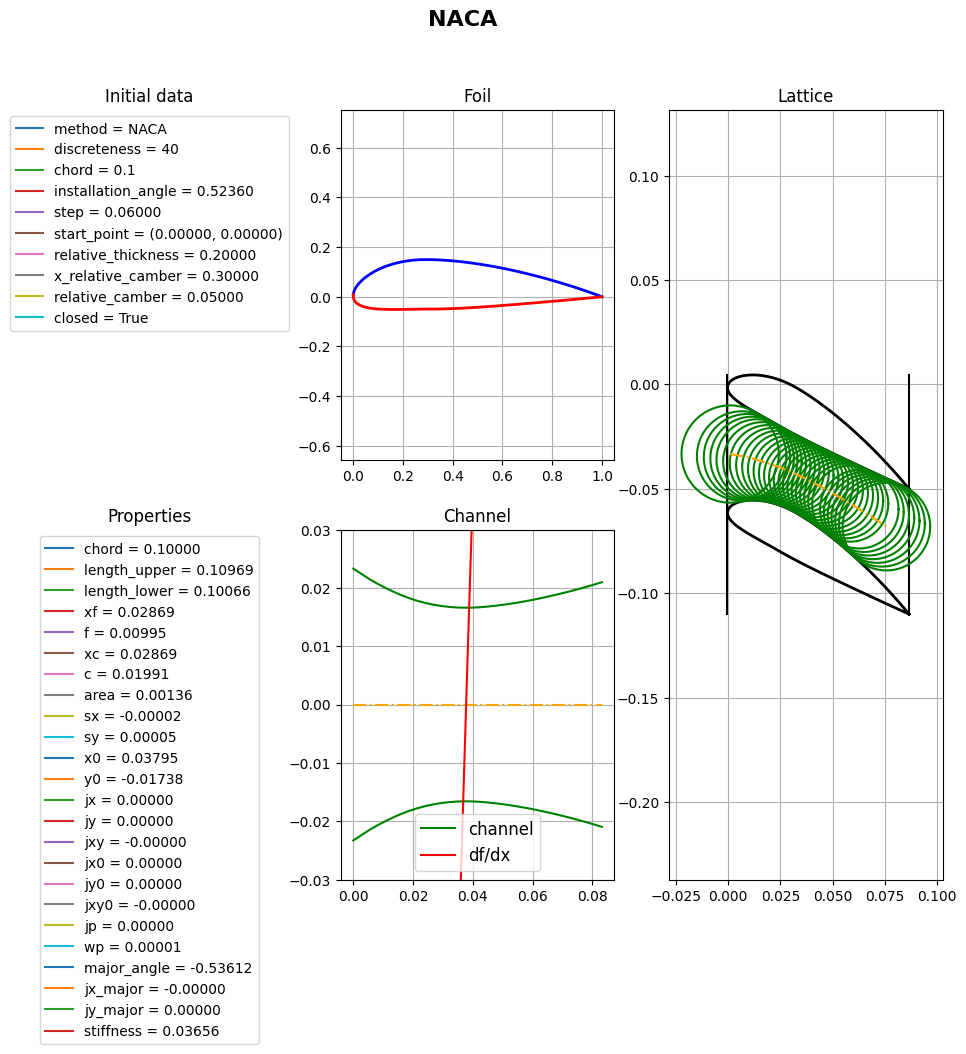

In [17]:
foil_naca.plot().show()

In [18]:
foil_naca.properties(relative=False)

{'chord': 0.1,
 'length_upper': 0.10969344189661162,
 'length_lower': 0.10065940544433652,
 'xf': 0.02869,
 'f': 0.00995476285261463,
 'xc': 0.02869,
 'c': 0.01990952570522926,
 'area': 0.0013573472525783543,
 'sx': -2.3585319995805277e-05,
 'sy': 5.151462660547318e-05,
 'x0': 0.037952430012009354,
 'y0': -0.017376039882943506,
 'jx': 6.26891433775102e-07,
 'jy': 2.510148002140632e-06,
 'jxy': -1.2055071670206284e-06,
 'jx0': 2.1707197287600452e-07,
 'jy0': 5.550427413016163e-07,
 'jxy0': -3.1038696056898385e-07,
 'jp': 7.721147141776208e-07,
 'wp': 1.3181401725248083e-05,
 'major_angle': -0.5361180278900298,
 'jx_major': -2.399532460911248e-07,
 'jy_major': 1.0120679602687456e-06,
 'stiffness': 0.036564480632203876}

CFD: 100%|██████████| 79/79 [00:00<00:00, 2333.96it/s]


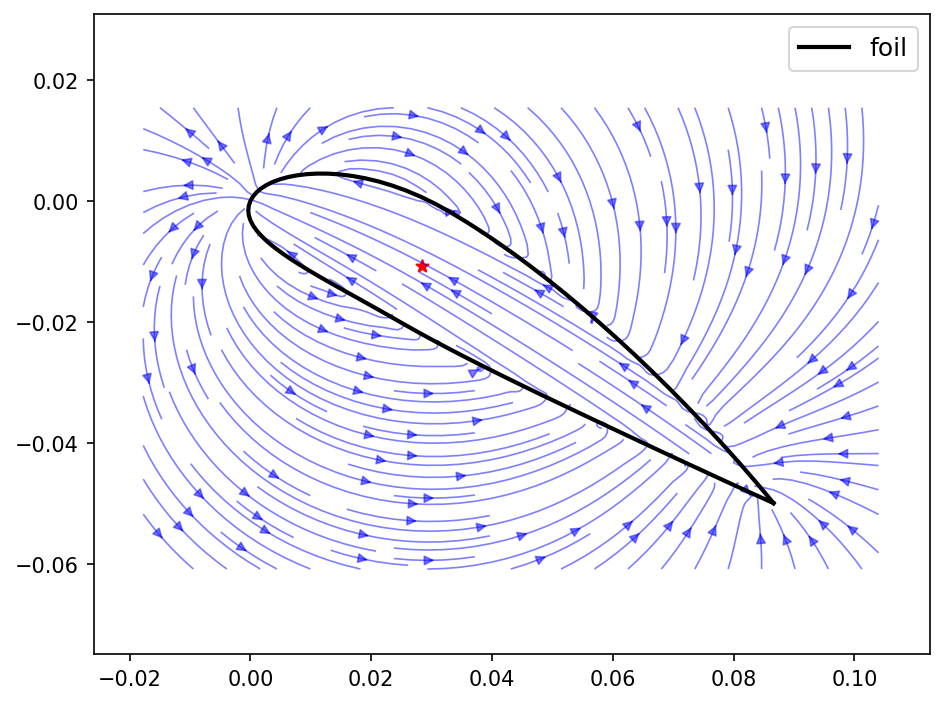

In [19]:
foil_naca.cfx(10,-8)

In [20]:
foil_naca.coordinates

((0.08660254037844388, -0.049999999999999996),
 (0.08378583890780676, -0.04663646781701182),
 (0.08093787410523012, -0.043349805123164074),
 (0.07806485659353013, -0.04014187527514837),
 (0.0751728764250124, -0.03701480955474306),
 (0.07226788167262276, -0.03397102863522777),
 (0.0693556648209351, -0.03101324656033573),
 (0.06644185667166673, -0.0281444579160596),
 (0.06353192727063113, -0.02536790933784507),
 (0.06063119317420428, -0.022687056915808315),
 (0.057744830208224365, -0.02010551142811681),
 (0.054877890734799095, -0.01762697363861408),
 (0.052035324336017014, -0.015255162131932013),
 (0.049222000750433974, -0.012993736322417435),
 (0.046442733859902066, -0.01084621735894019),
 (0.043702305521344714, -0.008815909654890817),
 (0.04100548807002052, -0.006905825702376939),
 (0.03835706438628848, -0.005118616684822275),
 (0.03576184451462663, -0.003456511187867558),
 (0.033224677948577835, -0.0019212640314999177),
 (0.03074026731337985, -0.0005317726291113179),
 (0.0282907760248

In [21]:
foil_naca.to_dataframe()

x         y
0   0.086603 -0.050000
1   0.083786 -0.046636
2   0.080938 -0.043350
3   0.078065 -0.040142
4   0.075173 -0.037015
..       ...       ...
74  0.072278 -0.043430
75  0.075837 -0.045079
76  0.079414 -0.046727
77  0.083004 -0.048369
78  0.086603 -0.050000

[79 rows x 2 columns]

In [22]:
foil_naca.write('txt')

## MYNK

In [23]:
foil_mynk = Foil('MYNK', 20, 
                 chord=0.25, installation_angle=radians(30), step=0.2, name='MYNK',
                 mynk_coefficient=0.2)

Channel calculation: 100%|██████████| 21/21 [00:00<00:00, 880.25it/s]


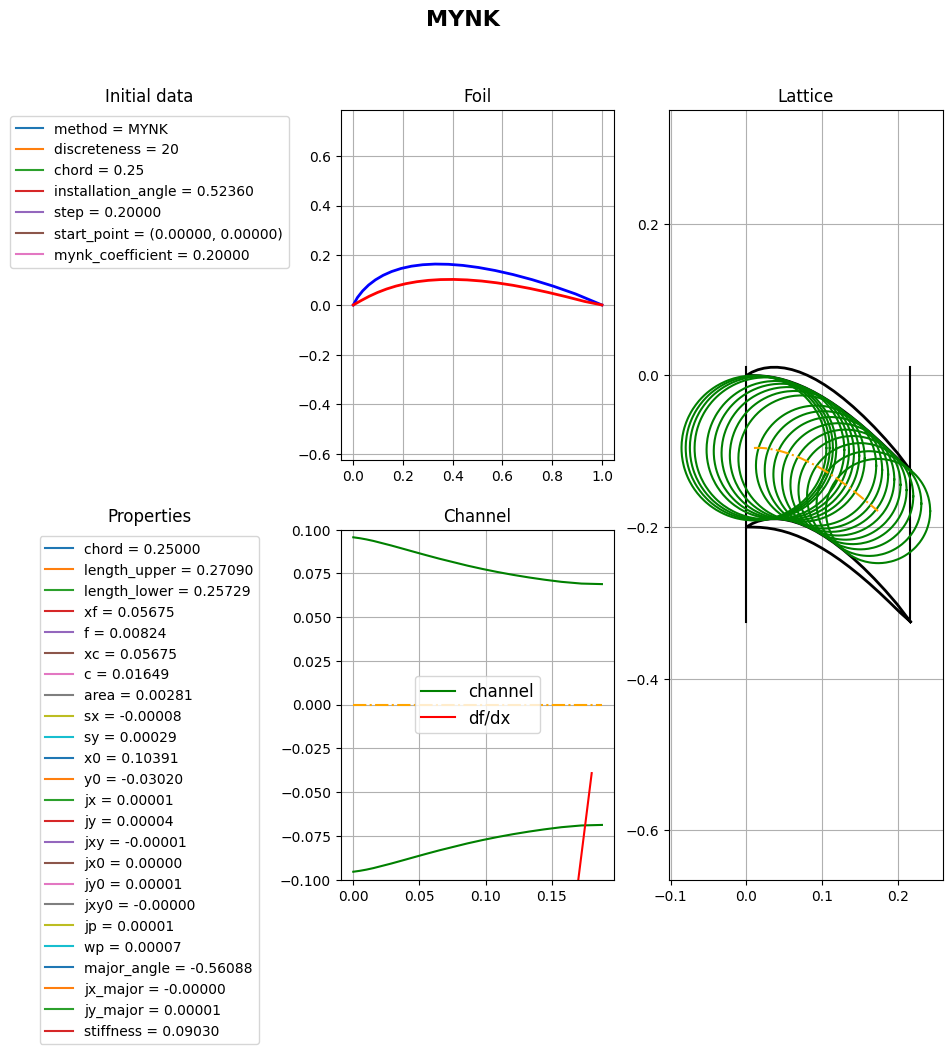

In [24]:
foil_mynk.plot().show()

In [25]:
foil_mynk.properties()

{'chord': 0.25,
 'length_upper': 0.27090450640667896,
 'length_lower': 0.2572914951789347,
 'xf': 0.05675,
 'f': 0.008242630604589128,
 'xc': 0.05675,
 'c': 0.016485261209178256,
 'area': 0.002810583208255212,
 'sx': -8.487751664371253e-05,
 'sy': 0.0002920578372171109,
 'x0': 0.1039136063857786,
 'y0': -0.030199254159923566,
 'jx': 5.643246500829635e-06,
 'jy': 3.7850019681726536e-05,
 'jxy': -1.3407458886376007e-05,
 'jx0': 3.080008803243018e-06,
 'jy0': 7.501236543265879e-06,
 'jxy0': -4.587530030858891e-06,
 'jp': 1.0581245346508896e-05,
 'wp': 7.188932045258515e-05,
 'major_angle': -0.5608769773829774,
 'jx_major': -3.934485724078623e-06,
 'jy_major': 1.451573107058752e-05,
 'stiffness': 0.09030150213555965}

CFD: 100%|██████████| 39/39 [00:00<00:00, 8812.99it/s]


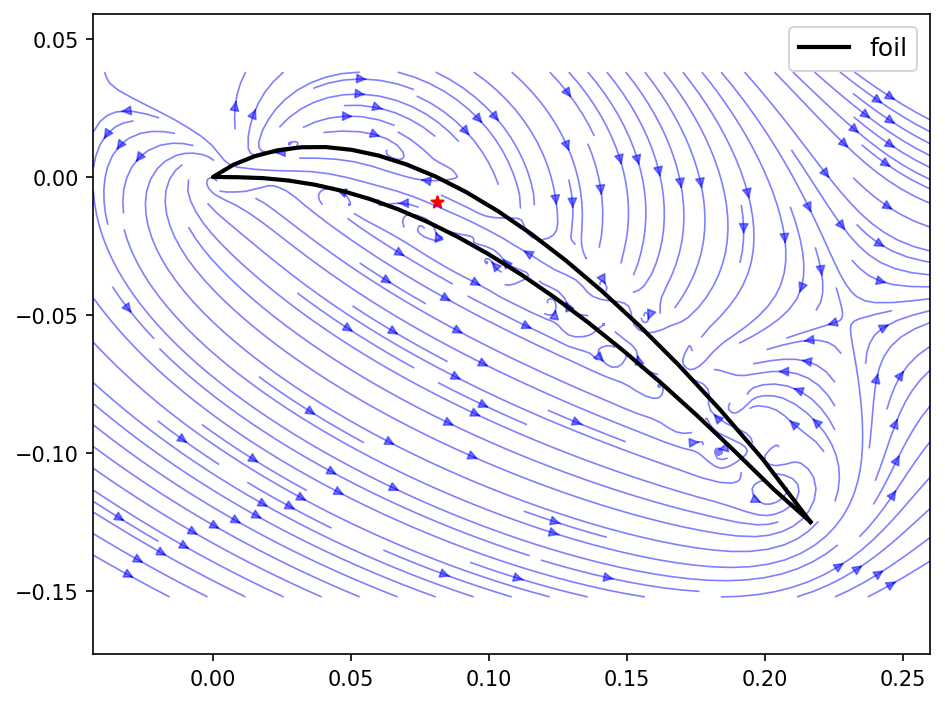

In [26]:
foil_mynk.cfx(10, -2)

In [27]:
foil_mynk.coordinates

((0.21650635094610968, -0.12499999999999999),
 (0.19913345670740662, -0.10216892885826205),
 (0.18349226182877695, -0.08404589134289493),
 (0.16863260783191064, -0.06804765726429142),
 (0.1544320096371302, -0.05384122201025054),
 (0.14083140215613094, -0.0412660031908409),
 (0.12779235459356086, -0.030217517614015865),
 (0.11528568790161069, -0.020616435148091767),
 (0.10328717666843364, -0.012396893290478602),
 (0.09177558902918478, -0.0055011682029949055),
 (0.08073168600336544, 0.00012304582585501953),
 (0.07013768171714668, 0.004524103893954565),
 (0.05997696084216877, 0.007747178694921562),
 (0.05023397156844161, 0.009834551496551316),
 (0.04089428214191613, 0.010825458430078408),
 (0.03194486323037747, 0.010755322811819134),
 (0.02337481645922952, 0.009653774446608199),
 (0.015177301768065608, 0.007539409653843436),
 (0.007356204822274822, 0.004401664334620381),
 (0.0, 0.0),
 (0.009010905952453909, -9.703142175324656e-05),
 (0.018106268594452447, -0.000423678297271655),
 (0.02740

In [28]:
foil_mynk.to_dataframe()

x         y
0   0.216506 -0.125000
1   0.199133 -0.102169
2   0.183492 -0.084046
3   0.168633 -0.068048
4   0.154432 -0.053841
5   0.140831 -0.041266
6   0.127792 -0.030218
7   0.115286 -0.020616
8   0.103287 -0.012397
9   0.091776 -0.005501
10  0.080732  0.000123
11  0.070138  0.004524
12  0.059977  0.007747
13  0.050234  0.009835
14  0.040894  0.010825
15  0.031945  0.010755
16  0.023375  0.009654
17  0.015177  0.007539
18  0.007356  0.004402
19  0.000000  0.000000
20  0.009011 -0.000097
21  0.018106 -0.000424
22  0.027404 -0.001299
23  0.036936 -0.002813
24  0.046725 -0.005026
25  0.056789 -0.007987
26  0.067144 -0.011738
27  0.077805 -0.016321
28  0.088785 -0.021771
29  0.100096 -0.028122
30  0.111750 -0.035405
31  0.123756 -0.043646
32  0.136123 -0.052865
33  0.148854 -0.063078
34  0.161950 -0.074282
35  0.175402 -0.086451
36  0.189179 -0.099506
37  0.203187 -0.113190
38  0.216506 -0.125000

In [29]:
foil_mynk.write('txt')

## PARSEC

In [30]:
foil_parsec = Foil('PARSEC', 50, 
                   chord=0.06, installation_angle=radians(30), step=0.06, name='PARSEC',
                      relative_inlet_radius = 0.01,
                      x_relative_camber_upper=0.35, x_relative_camber_lower = 0.45,
                      relative_camber_upper=0.055, relative_camber_lower = -0.006,
                      d2y_dx2_upper=-0.35, d2y_dx2_lower = -0.2,
                      theta_outlet_upper=radians(-10), theta_outlet_lower = radians(2))

Channel calculation: 100%|██████████| 52/52 [00:00<00:00, 952.70it/s]


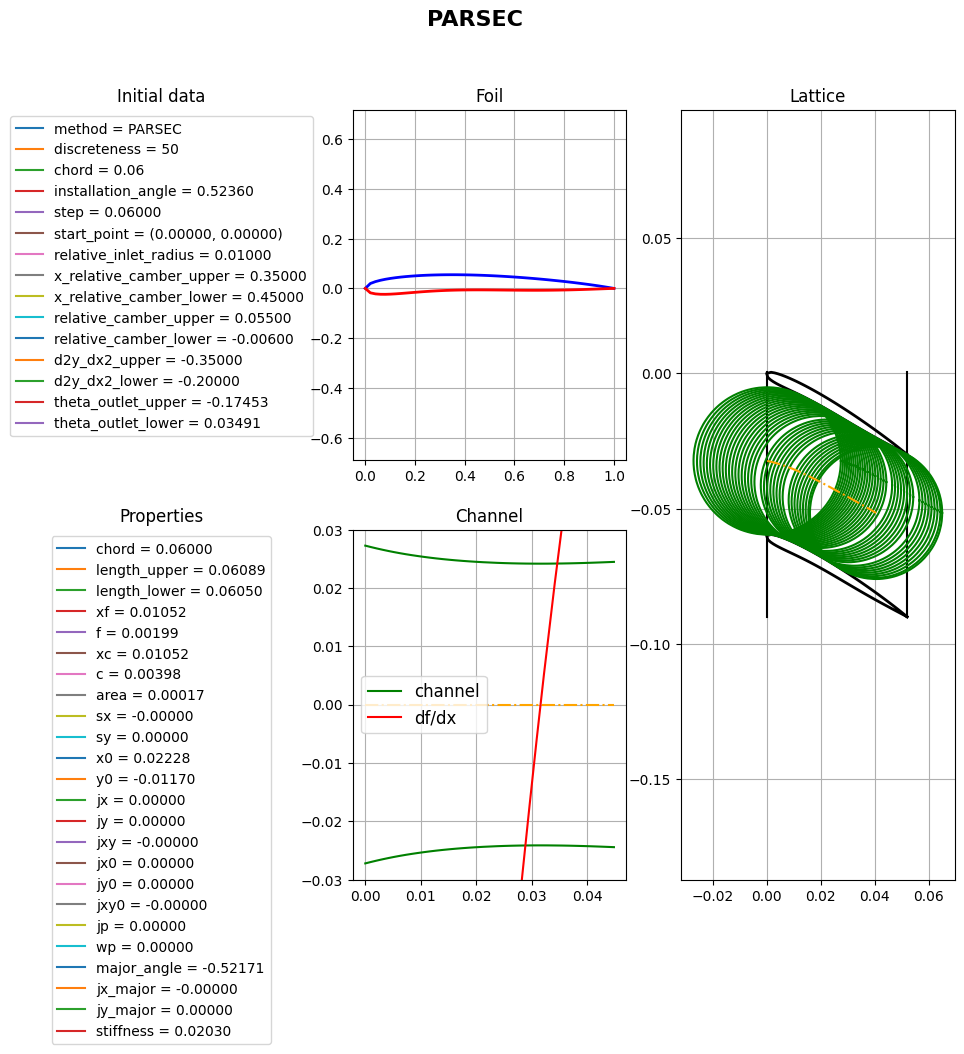

In [31]:
foil_parsec.plot().show()

In [32]:
foil_parsec.properties(relative=False)

{'chord': 0.06,
 'length_upper': 0.060890759910072374,
 'length_lower': 0.06050369303289463,
 'xf': 0.010524,
 'f': 0.0019911264259800535,
 'xc': 0.010524,
 'c': 0.003982252851960107,
 'area': 0.000173584450039567,
 'sx': -2.0311424726934572e-06,
 'sy': 3.867428165279844e-06,
 'x0': 0.02227980769244191,
 'y0': -0.011701177566484075,
 'jx': 3.324380699353561e-08,
 'jy': 1.1445689749646684e-07,
 'jxy': -6.140572959874792e-08,
 'jx0': 9.477048257721935e-09,
 'jy0': 2.829134170969847e-08,
 'jxy0': -1.6152265911186746e-08,
 'jp': 3.776838996742041e-08,
 'wp': 1.0831491368301014e-06,
 'major_angle': -0.5217077170782759,
 'jx_major': -1.3765412429409538e-08,
 'jy_major': 5.1533802396829946e-08,
 'stiffness': 0.020296919970024124}

CFD: 100%|██████████| 99/99 [00:00<00:00, 857.53it/s]


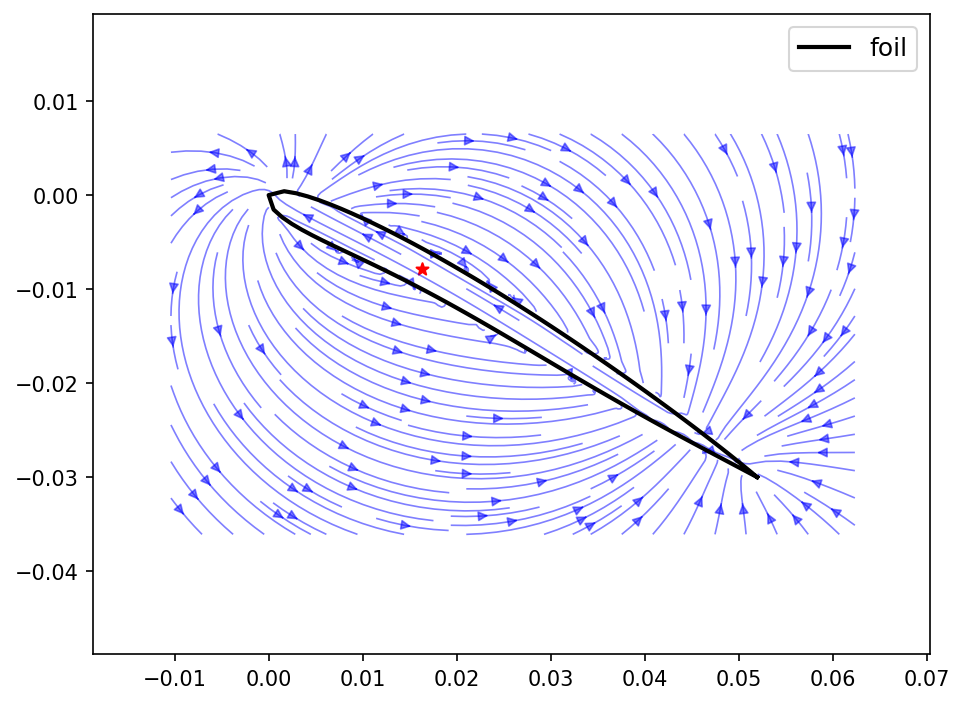

In [33]:
foil_parsec.cfx(5, -5)

In [34]:
foil_parsec.coordinates

((0.05196152422706632, -0.02999999999999999),
 (0.05100606838715347, -0.02920591846728071),
 (0.05004503523917893, -0.028421497115493737),
 (0.049078929561515376, -0.027645861642851034),
 (0.04810819911705788, -0.026878236501268585),
 (0.04713323807270617, -0.026117938973649436),
 (0.04615439033872212, -0.025364373389946755),
 (0.045171952825508, -0.024617025486258486),
 (0.044186178615113016, -0.02387545691161696),
 (0.043197280044501865, -0.02313929988761097),
 (0.042205431697303404, -0.022408252026525192),
 (0.041210773300389664, -0.021682071314318072),
 (0.040213412521207276, -0.02096057126550171),
 (0.0392134276612797, -0.020243616257859184),
 (0.03821087024070468, -0.01953111705596359),
 (0.03720576746776581, -0.018823026533685346),
 (0.03619812458693402, -0.018119335607334332),
 (0.035187927097520964, -0.017420069392839542),
 (0.034175142834018714, -0.01672528360249493),
 (0.0331597238976636, -0.01603506119939279),
 (0.03214160842692295, -0.015349509330850766),
 (0.0311207221923

In [35]:
foil_parsec.to_dataframe()

x         y
0   0.051962 -0.030000
1   0.051006 -0.029206
2   0.050045 -0.028421
3   0.049079 -0.027646
4   0.048108 -0.026878
..       ...       ...
94  0.047630 -0.027706
95  0.048713 -0.028279
96  0.049796 -0.028852
97  0.050879 -0.029426
98  0.051962 -0.030000

[99 rows x 2 columns]

In [36]:
foil_parsec.write('txt')

## BEZIER

In [37]:
coordinates = ((1.0, 0.0), (0.35, 0.200), (0.05, 0.100), 
          (0.0, 0.0), 
          (0.05, -0.10), (0.35, -0.05), (0.5, 0.0), (1.0, 0.0))

In [38]:
foil_bezier = Foil('BEZIER', 30, 
                   chord=0.8, installation_angle=radians(30), step=0.6, name='BEZIER',
                   coordinates=coordinates)

Channel calculation: 100%|██████████| 32/32 [00:00<00:00, 979.26it/s]


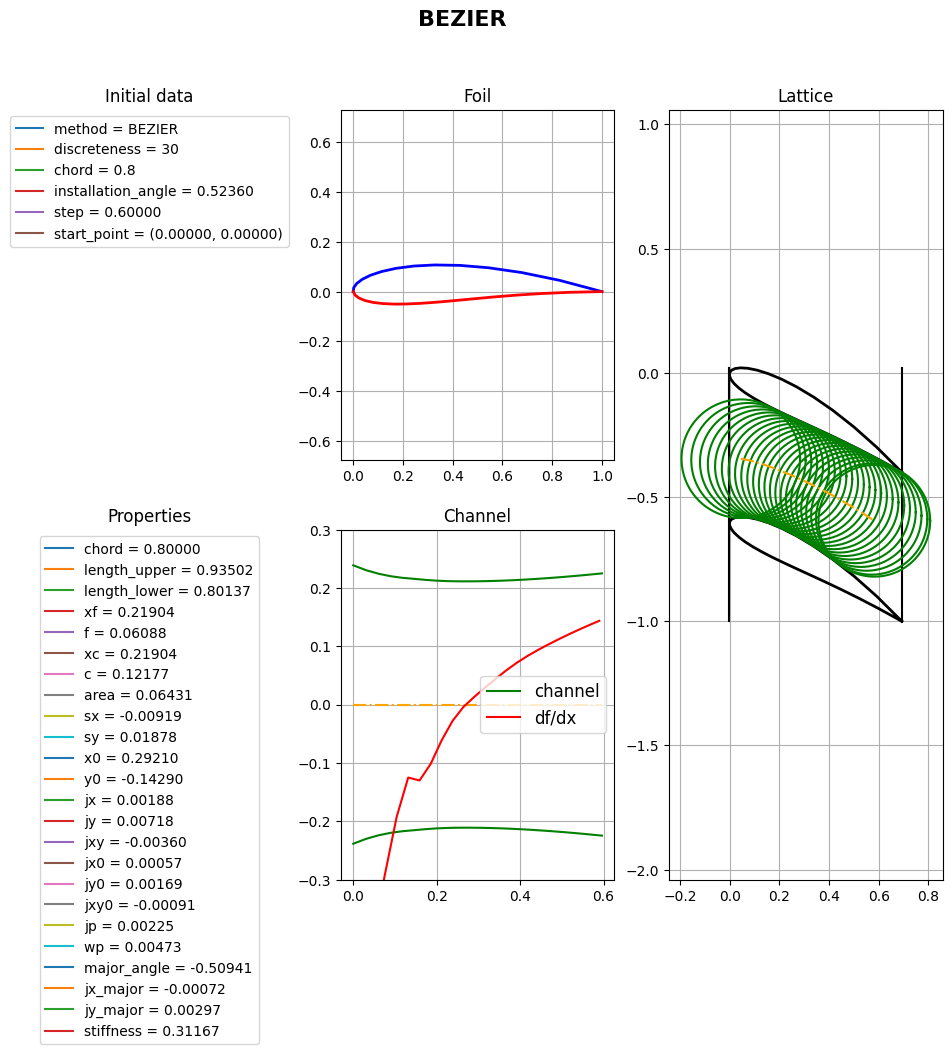

In [39]:
foil_bezier.plot().show()

In [40]:
foil_bezier.properties(relative=False)

{'chord': 0.8,
 'length_upper': 0.9350189206035836,
 'length_lower': 0.8013711561994272,
 'xf': 0.21904,
 'f': 0.060883751329196524,
 'xc': 0.21904,
 'c': 0.12176750265839305,
 'area': 0.06430997398176708,
 'sx': -0.009189953124410436,
 'sy': 0.018784660087477884,
 'x0': 0.29209559457765666,
 'y0': -0.14290089943149312,
 'jx': 0.0018787189341700548,
 'jy': 0.0071753742649976445,
 'jxy': -0.003596130142451681,
 'jx0': 0.0005654663669585431,
 'jy0': 0.0016884578078066158,
 'jxy0': -0.000911785320436221,
 'jp': 0.002253924174765159,
 'wp': 0.004734045796567225,
 'major_angle': -0.5094127722675108,
 'jx_major': -0.0007202245818571472,
 'jy_major': 0.0029741487566223063,
 'stiffness': 0.3116729735345279}

CFD: 100%|██████████| 30/30 [00:00<00:00, 2795.64it/s]


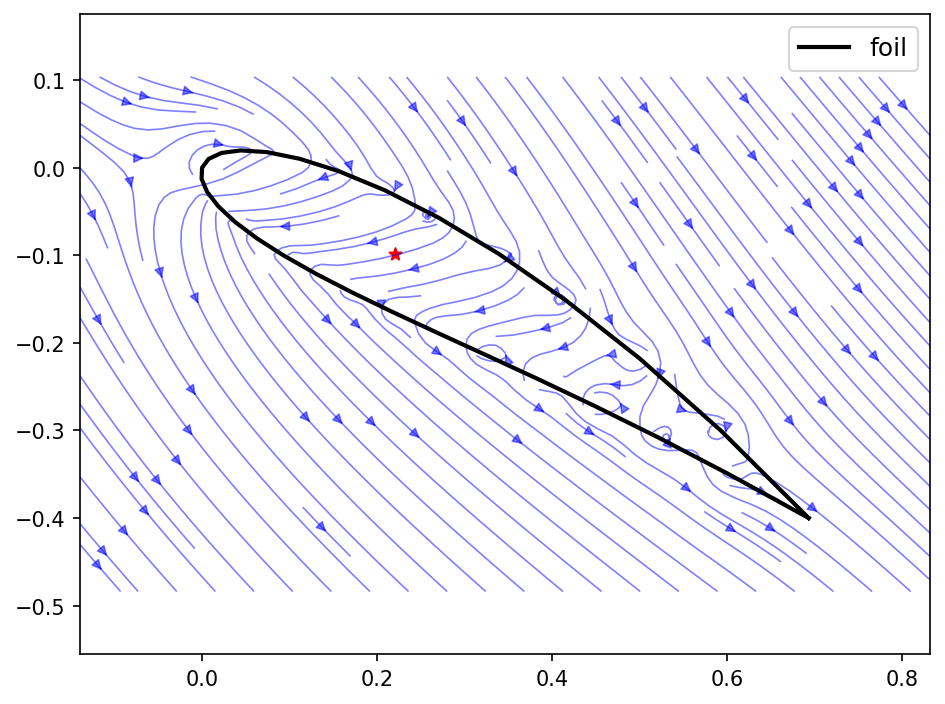

In [41]:
foil_bezier.cfx(20, -20)

In [42]:
foil_bezier.coordinates

((0.692820323027551, -0.39999999999999997),
 (0.5926598934012474, -0.3002420353986839),
 (0.5001113671583387, -0.21803667664845872),
 (0.4154025256678262, -0.1512862271628484),
 (0.33864848955305304, -0.09810506063018076),
 (0.26988559869138606, -0.05679871309430066),
 (0.20909686589877186, -0.025844654485600378),
 (0.15623005310860597, -0.003874790777229916),
 (0.11120941885433706, 0.010340252058661896),
 (0.0739421858652344, 0.01790501111979702),
 (0.04432077758475174, 0.019811185492892798),
 (0.022221872420912777, 0.016947699848186025),
 (0.007503324538146061, 0.010108781534500143),
 (-7.96609731270939e-19, -1.3797685283650565e-18),
 (-0.00048042292783449596, -0.01275778263622239),
 (0.005839359495234436, -0.027626601036586908),
 (0.018705151536622302, -0.04415176729634443),
 (0.037833243631084756, -0.061964493968633516),
 (0.06291655741925488, -0.080786810638129),
 (0.09363599899363069, -0.10043882521813957),
 (0.12967806916144126, -0.1208483811460101),
 (0.17075977953381916, -0.14

In [43]:
foil_bezier.to_dataframe()

x             y
0   6.928203e-01 -4.000000e-01
1   5.926599e-01 -3.002420e-01
2   5.001114e-01 -2.180367e-01
3   4.154025e-01 -1.512862e-01
4   3.386485e-01 -9.810506e-02
5   2.698856e-01 -5.679871e-02
6   2.090969e-01 -2.584465e-02
7   1.562301e-01 -3.874791e-03
8   1.112094e-01  1.034025e-02
9   7.394219e-02  1.790501e-02
10  4.432078e-02  1.981119e-02
11  2.222187e-02  1.694770e-02
12  7.503325e-03  1.010878e-02
13 -7.966097e-19 -1.379769e-18
14 -4.804229e-04 -1.275778e-02
15  5.839359e-03 -2.762660e-02
16  1.870515e-02 -4.415177e-02
17  3.783324e-02 -6.196449e-02
18  6.291656e-02 -8.078681e-02
19  9.363600e-02 -1.004388e-01
20  1.296781e-01 -1.208484e-01
21  1.707598e-01 -1.420632e-01
22  2.166619e-01 -1.642653e-01
23  2.672717e-01 -1.877885e-01
24  3.226361e-01 -2.131378e-01
25  3.830260e-01 -2.410121e-01
26  4.490139e-01 -2.723290e-01
27  5.215643e-01 -3.082530e-01
28  6.021395e-01 -3.502257e-01
29  6.928203e-01 -4.000000e-01

In [44]:
foil_bezier.write('txt')

## MANUAL

In [45]:
coordinates = ((1.0, 0.0), (0.5, 0.15), (0.35, 0.150), (0.10, 0.110), (0.05, 0.08),
          (0.0, 0.0), 
          (0.05, -0.025), (0.35, -0.025), (0.5, 0.0), (0.8, 0.025), (1.0, 0.0))
deg = 3

In [46]:
foil_manual = Foil('MANUAL', 30, 
                   chord=1.2, installation_angle=radians(30), step=0.6, name='MANUAL',
                   coordinates=coordinates, deg=deg)

Channel calculation: 100%|██████████| 32/32 [00:00<00:00, 855.52it/s]


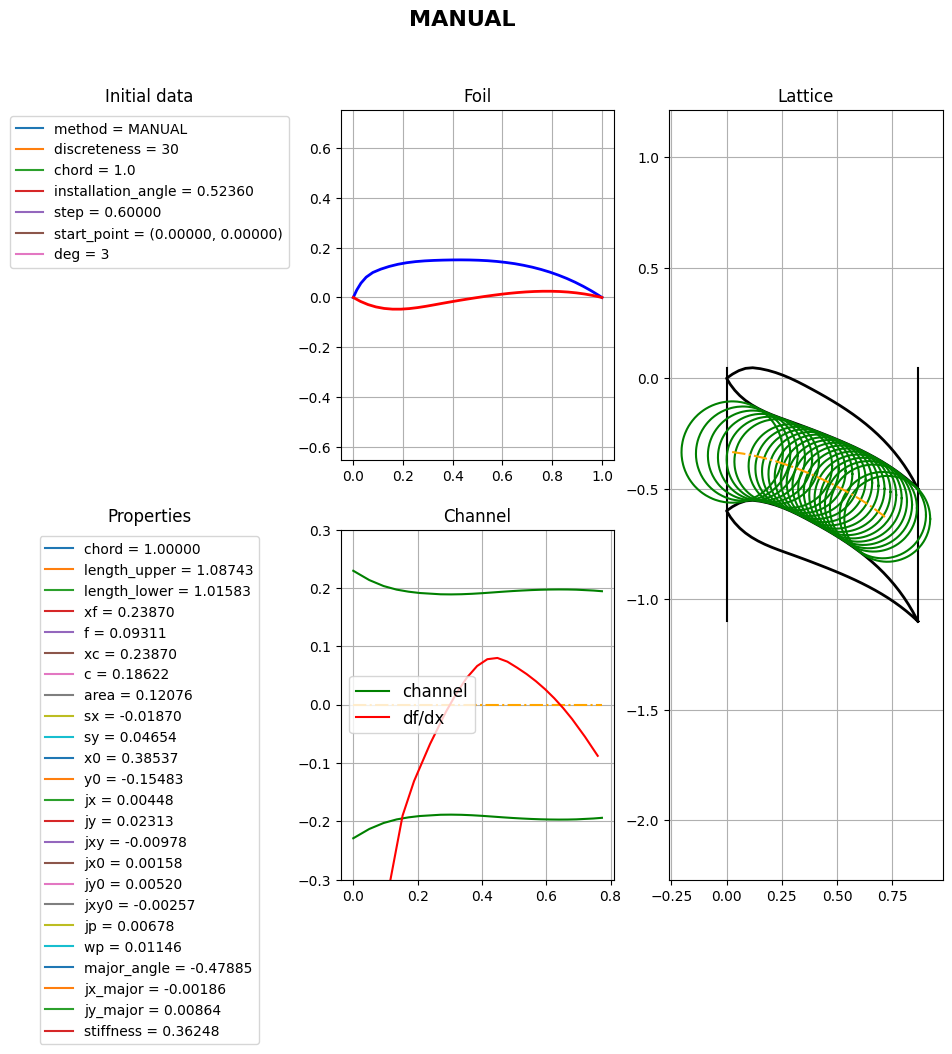

In [47]:
foil_manual.plot().show()

In [48]:
foil_manual.properties(relative=False)

{'chord': 1.0,
 'length_upper': 1.0874337681367217,
 'length_lower': 1.015831543187789,
 'xf': 0.23870000000000002,
 'f': 0.09311233419523263,
 'xc': 0.23870000000000002,
 'c': 0.18622466839046525,
 'area': 0.12075565879946004,
 'sx': -0.01869670166590204,
 'sy': 0.04653563807701698,
 'x0': 0.385370247155863,
 'y0': -0.15483085307788197,
 'jx': 0.004477227779603905,
 'jy': 0.02313352065211449,
 'jxy': -0.009776234087212388,
 'jx0': 0.0015824015109296347,
 'jy0': 0.005200070304818668,
 'jxy0': -0.0025710815452242826,
 'jp': 0.006782471815748302,
 'wp': 0.011461668287882502,
 'major_angle': -0.4788523990804645,
 'jx_major': -0.0018552017241869924,
 'jy_major': 0.008637673539935296,
 'stiffness': 0.36247792271224055}

CFD: 100%|██████████| 63/63 [00:00<00:00, 3633.23it/s]


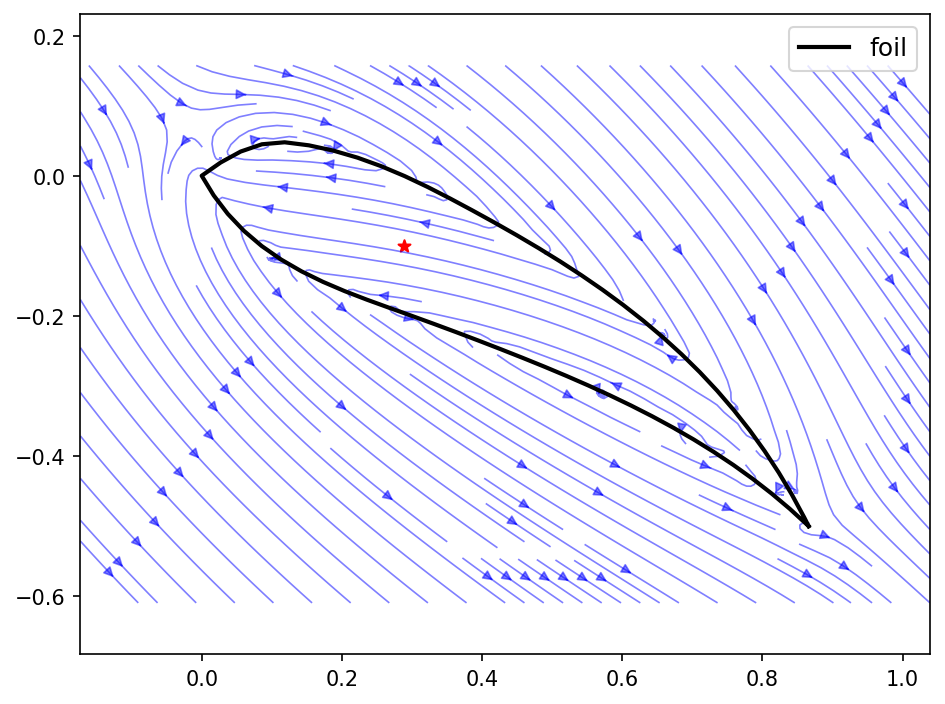

In [49]:
foil_manual.cfx(20, -20)

In [50]:
foil_manual.coordinates

((0.8660254037844387, -0.49999999999999994),
 (0.8596315218481766, -0.48734670640299765),
 (0.8421655522417151, -0.4550703654514361),
 (0.8233886938111815, -0.42357462708726507),
 (0.8033074905806579, -0.392936175311828),
 (0.7819442814484784, -0.3632250730293974),
 (0.7593373190208025, -0.33450122942398264),
 (0.7355398990620217, -0.3068111523154454),
 (0.7106185501749365, -0.28018533710921),
 (0.684650474686232, -0.2546365650020405),
 (0.6577205354785464, -0.23015924769707563),
 (0.6299181249434886, -0.20672979963344865),
 (0.601334227629135, -0.1843078816579264),
 (0.5720589136728419, -0.16283827137151144),
 (0.5421794025646227, -0.14225308528151404),
 (0.5117787422468745, -0.12247409863660486),
 (0.48093507458592355, -0.10341496231474456),
 (0.44972141172702884, -0.08498318260693409),
 (0.4182058270845374, -0.0670817937607637),
 (0.3864519633601744, -0.049610705841646126),
 (0.35450581705626744, -0.03250337022669039),
 (0.32226324452827293, -0.01600179887777803),
 (0.28956114288799

In [51]:
foil_manual.to_dataframe()

x         y
0   0.866025 -0.500000
1   0.859632 -0.487347
2   0.842166 -0.455070
3   0.823389 -0.423575
4   0.803307 -0.392936
..       ...       ...
58  0.786428 -0.432668
59  0.813235 -0.453492
60  0.839219 -0.475382
61  0.864303 -0.498350
62  0.866025 -0.500000

[63 rows x 2 columns]

In [52]:
foil_manual.write('txt')

# CIRCLE (airfoil)

In [53]:
foil_circle_airfoil = Foil('CIRCLE', 60, 
                           chord=0.5, installation_angle=radians(30), step=0.3, name='CIRCLE',
                           relative_circles = ((0.1, 0.04),
                                               (0.2, 0.035),
                                               (0.3, 0.03),
                                               (0.4, 0.028),
                                               (0.5, 0.025),
                                               (0.6, 0.02),),
                                               rotation_angle = radians(40),
                                               x_ray_cross = 0.5,
                                               is_foil = True)

Channel calculation: 100%|██████████| 61/61 [00:00<00:00, 1071.61it/s]


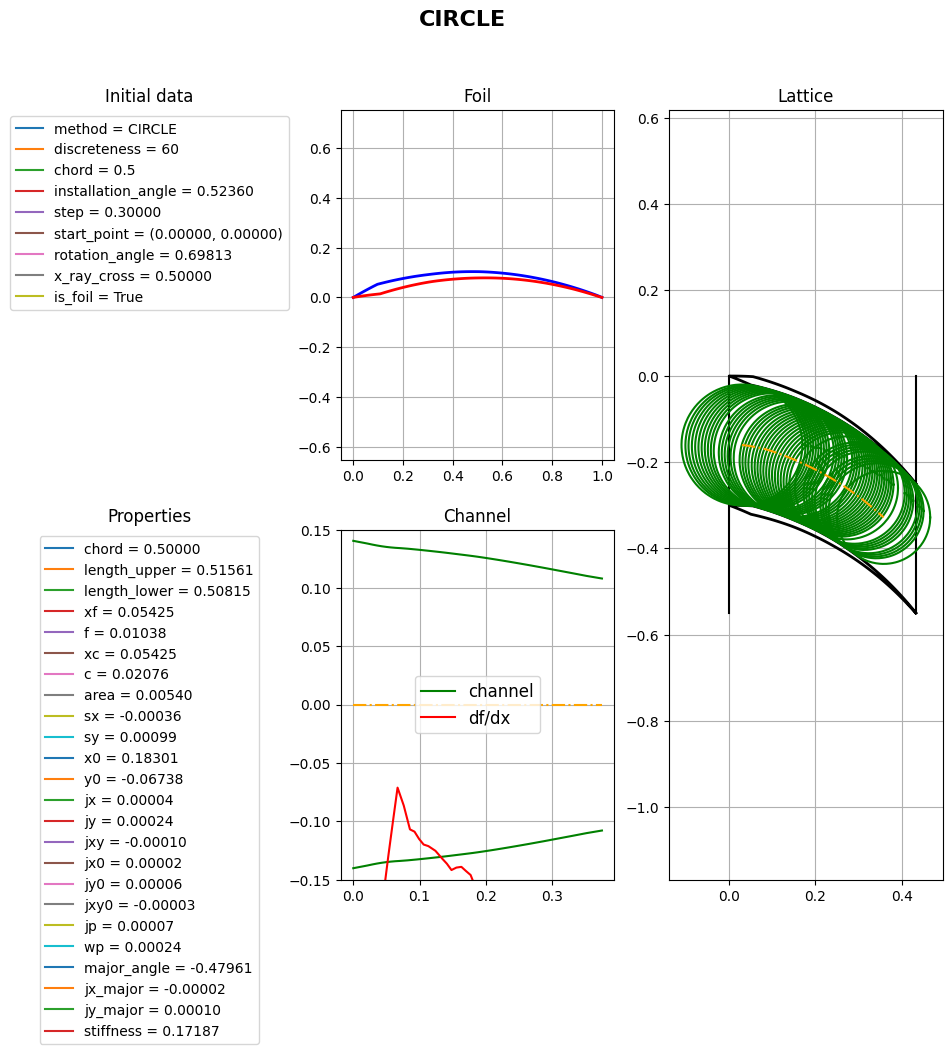

In [54]:
foil_circle_airfoil.plot().show()

In [55]:
foil_circle_airfoil.properties()

{'chord': 0.5,
 'length_upper': 0.5156144114952023,
 'length_lower': 0.5081534964300823,
 'xf': 0.05425,
 'f': 0.01037791466765881,
 'xc': 0.05425,
 'c': 0.02075582933531762,
 'area': 0.005403579545172156,
 'sx': -0.0003640858124250569,
 'sy': 0.0009888982936018997,
 'x0': 0.1830080015173338,
 'y0': -0.06737863473303551,
 'jx': 4.077370451848084e-05,
 'jy': 0.0002392663240853839,
 'jxy': -9.661044421980573e-05,
 'jx0': 1.624209955161245e-05,
 'jy0': 5.829002366939862e-05,
 'jxy0': -2.997982730708122e-05,
 'jp': 7.453212322101107e-05,
 'wp': 0.0002407358861904106,
 'major_angle': -0.4796091651962226,
 'jx_major': -2.3896607949101315e-05,
 'jy_major': 9.84287311701124e-05,
 'stiffness': 0.17187147049840076}

CFD: 100%|██████████| 123/123 [00:00<00:00, 569.51it/s]


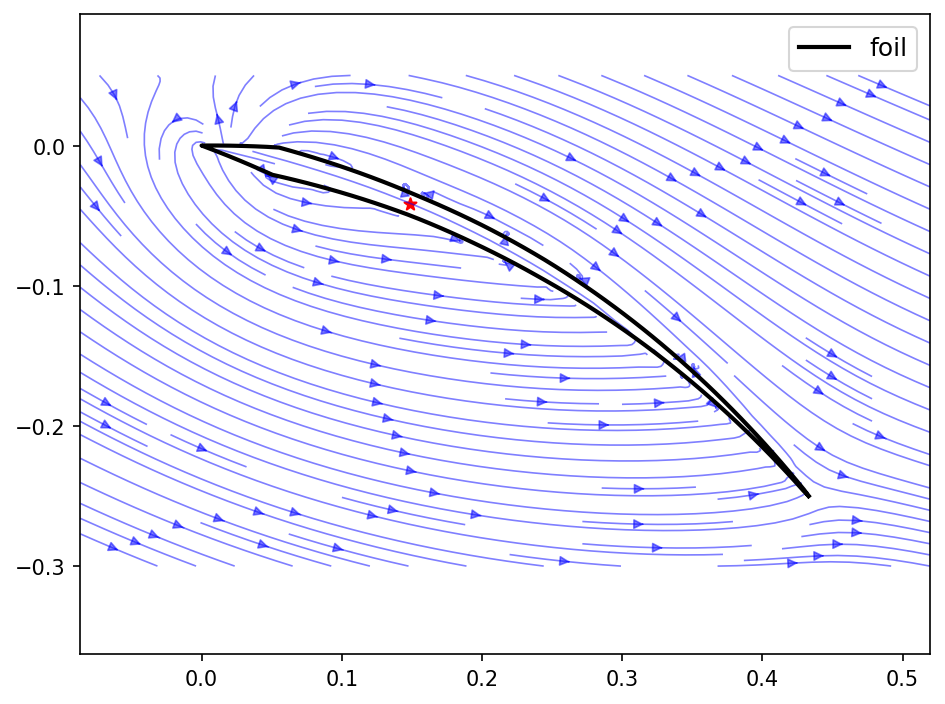

In [56]:
foil_circle_airfoil.cfx(15, -5)

In [57]:
foil_circle_airfoil.coordinates

((0.43301270189221935, -0.24999999999999997),
 (0.429783959585263, -0.24557227757462907),
 (0.4243705240317669, -0.23897152334145927),
 (0.4188874909080373, -0.23242613037653992),
 (0.4133346603062943, -0.2259374416862544),
 (0.4077118695051834, -0.21950681123977467),
 (0.40201899463859747, -0.21313560230832015),
 (0.39625595232672134, -0.2068251856854185),
 (0.39042270125841244, -0.20057693778904168),
 (0.3845192437140361, -0.1943922386479278),
 (0.3785456270168719, -0.18827246977472625),
 (0.3725019449021061, -0.1822190119308755),
 (0.36638833879097005, -0.17623324278788435),
 (0.3602049989581104, -0.17031653449146136),
 (0.35395216558123527, -0.16447025113689445),
 (0.3476301296603491, -0.15869574616340873),
 (0.3412392337970189, -0.15299435967894115),
 (0.3347798728213283, -0.1473674157248992),
 (0.3282524942580451, -0.1418162194944221),
 (0.32165759862294263, -0.13634205451734224),
 (0.3149957395396308, -0.130946179824766),
 (0.3082675236730325, -0.1256298271107473),
 (0.301473610

In [58]:
foil_circle_airfoil.to_dataframe()

x         y
0    0.433013 -0.250000
1    0.429784 -0.245572
2    0.424371 -0.238972
3    0.418887 -0.232426
4    0.413335 -0.225937
..        ...       ...
118  0.411877 -0.227259
119  0.417712 -0.233469
120  0.423483 -0.239742
121  0.429189 -0.246079
122  0.433013 -0.250000

[123 rows x 2 columns]

In [59]:
foil_circle_airfoil.write('txt')

# CIRCLE (channel)

In [60]:
foil_circle_channel = Foil('CIRCLE', 60, 
                           chord=0.6, installation_angle=radians(30), step=0.5, name='CIRCLE',
                           relative_circles = ((0.1, 0.4),
                                               (0.2, 0.4),
                                               (0.3, 0.4),
                                               (0.4, 0.4),
                                               (0.5, 0.4),
                                               (0.6, 0.4),
                                               (0.8, 0.4),
                                               (0.9, 0.4),),
                                               rotation_angle = radians(40),
                                               x_ray_cross = 0.5,
                                               is_foil = False)

Channel calculation: 100%|██████████| 61/61 [00:00<00:00, 1009.18it/s]


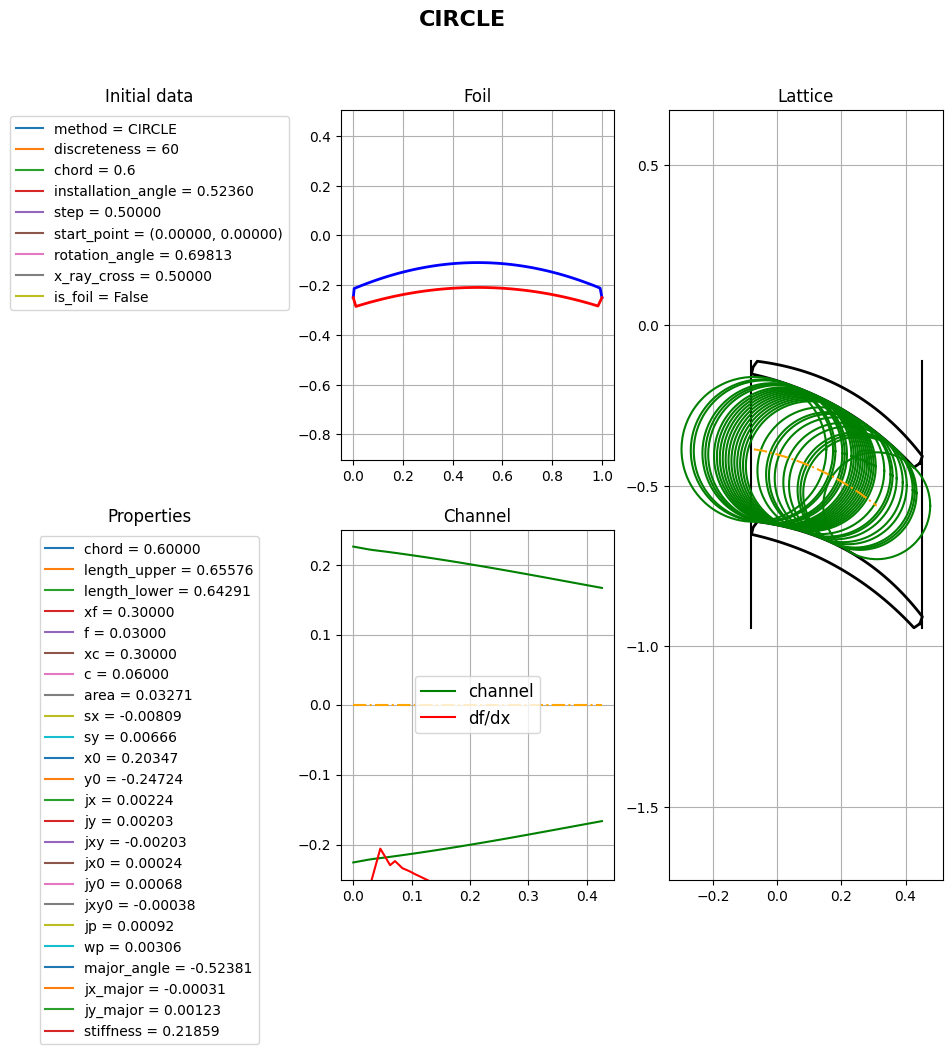

In [61]:
foil_circle_channel.plot().show()

In [62]:
foil_circle_channel.properties(relative=False)

{'chord': 0.6,
 'length_upper': 0.6557626288474508,
 'length_lower': 0.6429121083632967,
 'xf': 0.3,
 'f': 0.02999999998276045,
 'xc': 0.3,
 'c': 0.0599999999655209,
 'area': 0.03271084331828156,
 'sx': -0.008087322882640403,
 'sy': 0.006655728488675804,
 'x0': 0.2034716263324225,
 'y0': -0.24723675889213562,
 'jx': 0.0022368538216934373,
 'jy': 0.002032608764369613,
 'jxy': -0.0020278130748633857,
 'jx0': 0.00023737032407522085,
 'jy0': 0.0006783568643517108,
 'jxy0': -0.00038227233525712774,
 'jp': 0.0009157271884269317,
 'wp': 0.003058661473026861,
 'major_angle': -0.5238065623353537,
 'jx_major': -0.00031457758848780094,
 'jy_major': 0.0012303047769147326,
 'stiffness': 0.21858754294915028}

CFD: 100%|██████████| 125/125 [00:00<00:00, 557.35it/s]


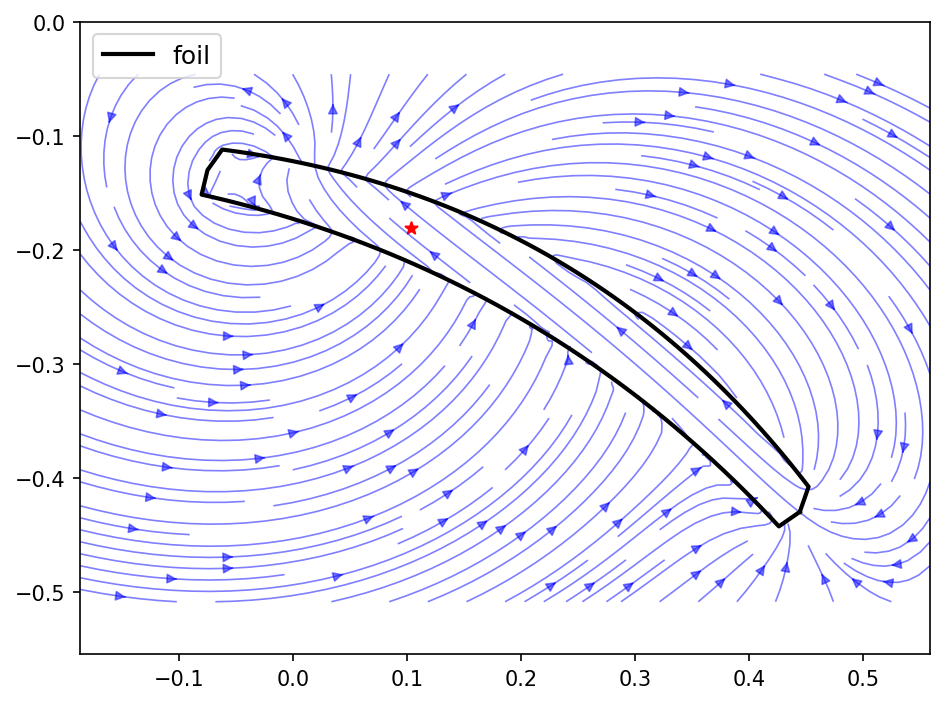

In [63]:
foil_circle_channel.cfx(15, -5)

In [64]:
foil_circle_channel.coordinates

((0.44461524227066324, -0.42990381056766575),
 (0.45231966383528327, -0.40784138933476566),
 (0.4467734122122798, -0.40068385895759134),
 (0.4411655229185352, -0.3935930594603497),
 (0.43549590517322606, -0.38657013002660634),
 (0.429764488039828, -0.37961620461310336),
 (0.4239712207471639, -0.3727324104586428),
 (0.41811607293805053, -0.36591986652598274),
 (0.4121990349368889, -0.35917968199268646),
 (0.406220117926024, -0.3525129546665981),
 (0.4001793541098751, -0.34592076942696826),
 (0.39407679683936675, -0.339404196664443),
 (0.38791252069604065, -0.3329642907259909),
 (0.3816866215465981, -0.3266020883822782),
 (0.3753992165593451, -0.32031860731385337),
 (0.36905044420116, -0.314114844640156),
 (0.36264046419126755, -0.30799177547197876),
 (0.35616945744185247, -0.3019503515216749),
 (0.3496376259831591, -0.2959914997708854),
 (0.34304519285434426, -0.29011612118153146),
 (0.33639240200325127, -0.28432508949211865),
 (0.32967951814968965, -0.27861925005976745),
 (0.3229068266

In [65]:
foil_circle_channel.to_dataframe()

x         y
0    0.444615 -0.429904
1    0.452320 -0.407841
2    0.446773 -0.400684
3    0.441166 -0.393593
4    0.435496 -0.386570
..        ...       ...
120  0.402285 -0.417601
121  0.410372 -0.425866
122  0.418359 -0.434210
123  0.426247 -0.442632
124  0.444615 -0.429904

[125 rows x 2 columns]

In [66]:
foil_circle_channel.write('txt')

# Load

In [67]:
foil = Foil('NACA', 40, 
            chord=1, installation_angle=radians(30), step=0.6, 
            relative_thickness=0.1, x_relative_camber=0.3, relative_camber=0, closed=True)

Channel calculation: 100%|██████████| 42/42 [00:00<00:00, 854.77it/s]


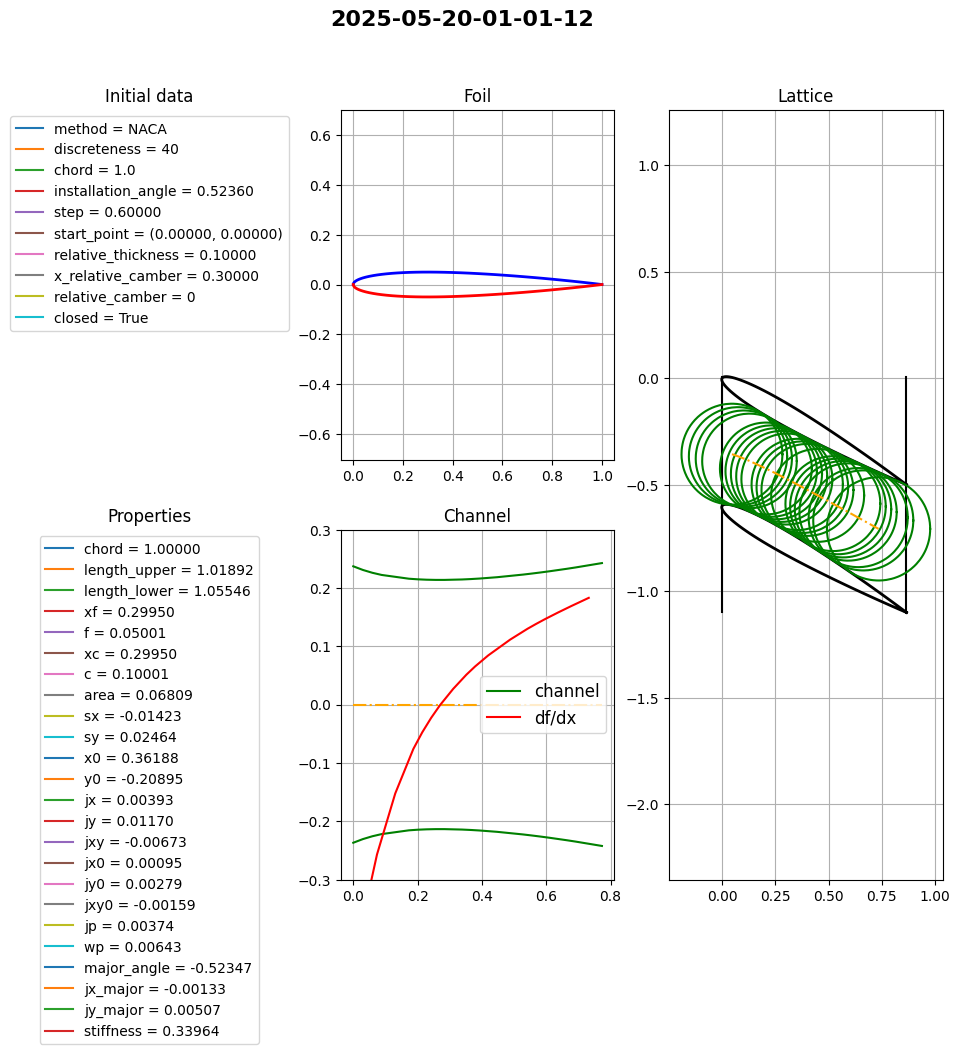

In [68]:
foil.plot().show()

In [69]:
coordinates = foil.transform(foil.coordinates,
                             transfer=(foil.properties()['x0'], foil.properties()['y0']), scale=5)

In [70]:
coordinates

((2.5207062745484308, -1.4552343594268582),
 (2.3582323672098218, -1.3339880207474177),
 (2.1954346334493775, -1.213955680904473),
 (2.032621826970514, -1.095254618462771),
 (1.8700954136826506, -0.978012617824916),
 (1.7081487717041475, -0.8623683006640076),
 (1.5470666499084909, -0.7484710146899496),
 (1.3871248761957076, -0.6364802967242239),
 (1.228590300224607, -0.5265649382123594),
 (1.0717209494742328, -0.41890169145171907),
 (0.9167663723594153, -0.313673663704539),
 (0.7639681378289311, -0.21106845378837114),
 (0.6135604575252382, -0.11127609151580134),
 (0.46577089425519275, -0.01448684436562167),
 (0.32082111925700013, 0.07911104206984251),
 (0.17892768056613328, 0.16933360303014997),
 (0.0403027456694946, 0.2560033476614759),
 (-0.09484521644856497, 0.338951324307587),
 (-0.22631084589085, 0.41801900111870416),
 (-0.3538914233449844, 0.49305991159720897),
 (-0.4773865462860094, 0.5639410225185406),
 (-0.5965979685696371, 0.630543790553614),
 (-0.7113296165300853, 0.69276488

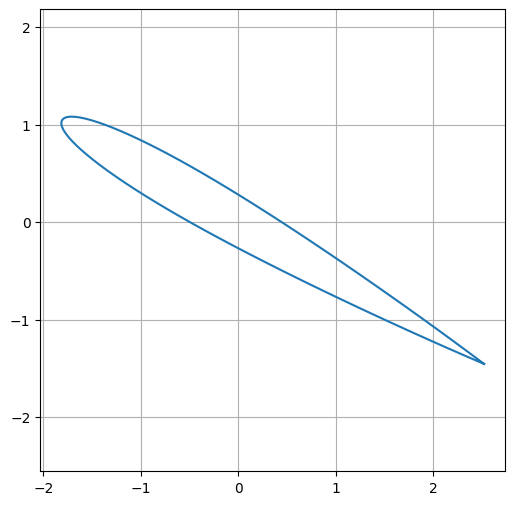

In [71]:
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.grid(True)
plt.plot(*array(coordinates).T)

In [72]:
foil = Foil.load(coordinates, deg=1, discreteness=80, step=3, name='Load')

Channel calculation: 100%|██████████| 82/82 [00:00<00:00, 1209.49it/s]


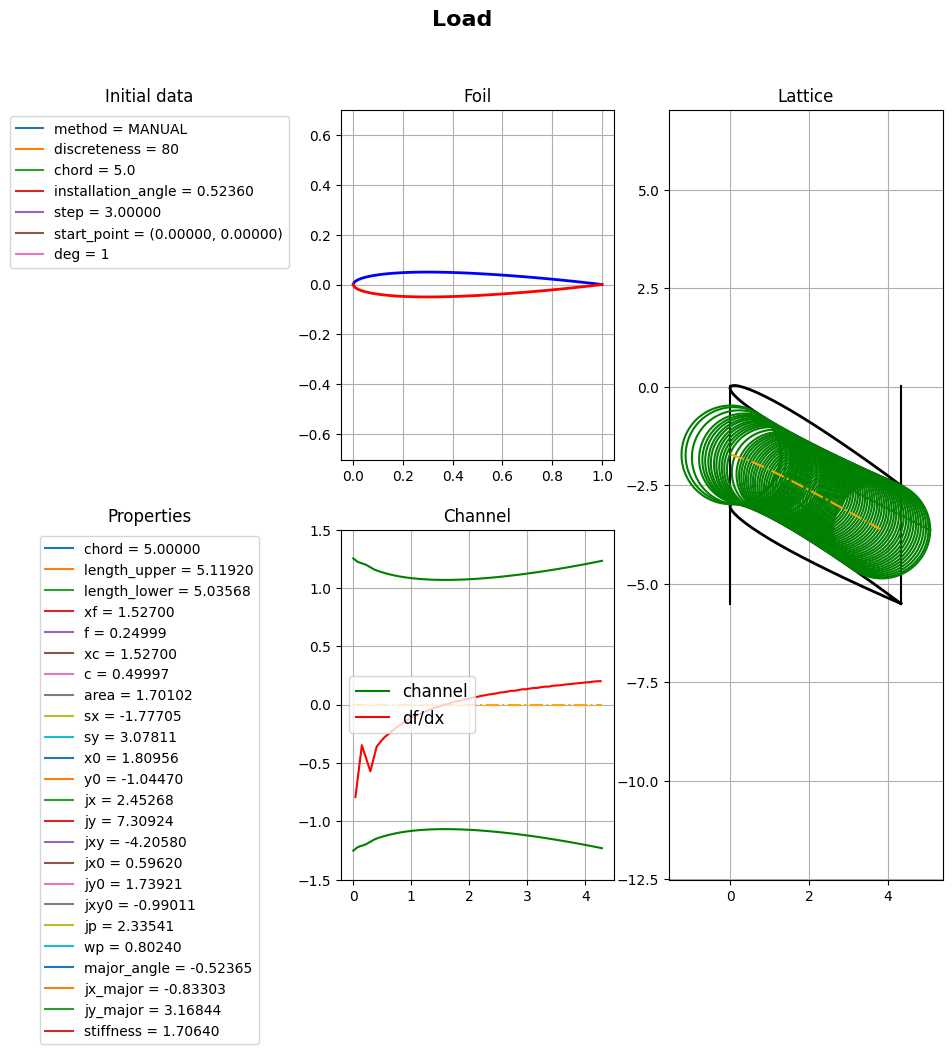

In [73]:
foil.plot().show()